# Data collection notebook

### Objectives
* Collect data from [Kaggle](https://www.kaggle.com/)
* Inspect the dataset and save it in an appropriate folder

### Inputs
JSON file (Kaggle authentication token)


### Outputs
Fetch dataset and store it in an appropriate inpit folder

### Notes
Do **not forget** to add kaggle.json to .gitignore

## Create directory for input data

#### Check current directory

In [8]:
import os
current_dir = '/workspaces/ml-template-tabular/jupyter_notebooks/' # The directory with the current ipynb. This automatically becomes our pwd when we open it.
print(f"Your current working directory is: {current_dir}")

Your current working directory is: /workspaces/ml-template-tabular/jupyter_notebooks/


#### Go to parent project directory

In [9]:
os.chdir(os.path.join(current_dir, os.pardir))
print(f"You set your new working directory:")
!pwd

You set your new working directory:
/workspaces/ml-template-tabular


## Fetch data from [Kaggle](https://www.kaggle.com/)

### Install Kaggle

In [ ]:
%pip install kaggle # symbol % converts the line into the `bash` command
%pip show kaggle # check if Kaggle is installed and which version is current

### Data collection

Add here a general information on the dataset, screenshots (see markdown syntax reference in the README file on how to include image) where appropriate. At this point you will need your kaggle authentication token (kaggle.json) file.

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
# ! chmod 600 kaggle.json
# to recognise the token in the session

Get the dataset path from the Kaggle url: **check what is after https://www.kaggle.com/ .**
Define the Kaggle dataset, and destination folder and download it.

In [ ]:
# KaggleDatasetPath = "datasets/ismetsemedov/transactions" # Path is given as an example
# DestinationFolder = "inputs/datasets/raw"   
# ! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

In this particular case, the dataset was simply downloaded from the [link](https://www.kaggle.com/code/jesusgraterol/bitcoin-blockchain-historical-data/input). I manually created folder `'/workspaces/ml-template-tabular/inputs/dataset/raw'` to store raw data. The dataset (demonstration purpose) represents Bitcoin hystorical data:

![dataset](../assets/img/dataset.jpg)

### Unzip downloaded file

#### Set folder variable

In [13]:
destination_folder = './inputs/dataset/raw/'

In [14]:
! unzip {destination_folder}/*.zip -d {destination_folder} \
  && rm {destination_folder}/*.zip

Archive:  ./inputs/dataset/raw//dataset.csv.zip
  inflating: ./inputs/dataset/raw/dataset.csv  


### Inspect data

In [4]:
import pandas as pd
hist_data = pd.read_csv(f"/workspaces/ml-template-tabular/inputs/dataset/raw/dataset.csv")
# Create the datetime column to simplify the displaying of dates
hist_data["datetime"] = pd.to_datetime(hist_data["timestamp"], unit="ms")
hist_data.tail()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime
800209,800210,1690287219000,1833624,4617,5.391117e+13,6.098668,10,10798418,5.774597,627.943485,7378,8118,361865784734,2023-07-25 12:13:39
800210,800211,1690288028000,1551677,2498,5.391117e+13,8.316228,13,13154779,7.000000,1033.057851,7937,6607,722603107147,2023-07-25 12:27:08
800211,800212,1690289642000,1579431,3801,5.391117e+13,12.954254,21,21780968,9.500000,673.035211,6964,11297,1327695528497,2023-07-25 12:54:02
800212,800213,1690290103000,1580228,3162,5.391117e+13,8.225113,14,14728273,7.027581,671.291714,7037,10083,640226583272,2023-07-25 13:01:43
800213,800214,1690290559000,1385714,2114,5.391117e+13,18.115942,17,17859404,7.050000,336.653504,4351,5102,429616498351,2023-07-25 13:09:19


In [5]:
hist_data.describe()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,datetime
count,800214.000000,8.002140e+05,8.002140e+05,800214.000000,8.002140e+05,8.002140e+05,8.002140e+05,8.002140e+05,800214.000000,8.002140e+05,800214.000000,800214.000000,8.002140e+05,800214
mean,400107.500000,1.460066e+12,6.231263e+05,1086.861858,7.198567e+12,5.525847e+01,9.379183e+01,3.359235e+07,9.384931,2.160209e+03,2847.751623,3053.467912,1.047352e+12,2016-04-07 21:59:54.793928960
min,1.000000,1.231470e+12,1.760000e+02,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,2009-01-09 02:54:25
25%,200054.250000,1.348345e+12,3.269500e+04,66.000000,2.864141e+06,1.000000e+00,1.000000e+01,1.900000e+06,0.000000,2.240000e+02,149.000000,163.000000,8.241160e+10,2012-09-22 20:18:48.500000
50%,400107.500000,1.456477e+12,4.278080e+05,657.000000,1.584272e+11,1.400000e+01,2.900000e+01,1.040256e+07,1.000000,4.740000e+02,1988.000000,1784.000000,4.023121e+11,2016-02-26 08:49:54.500000
75%,600160.750000,1.571546e+12,1.132182e+06,2065.000000,1.275982e+13,5.100000e+01,8.300000e+01,3.161996e+07,1.000000,1.321000e+03,5343.000000,5443.000000,1.138691e+12,2019-10-20 04:30:28.750000128
max,800214.000000,1.690291e+12,3.978938e+06,12239.000000,5.391117e+13,1.029502e+06,1.143052e+06,2.915328e+10,56155.000000,4.933333e+07,20894.000000,23642.000000,6.499324e+14,2023-07-25 13:09:19
std,231002.028492,1.298065e+11,5.962720e+05,1093.286117,1.200650e+13,1.208280e+03,1.890674e+03,9.205651e+07,148.221712,8.556237e+04,2677.176250,3230.421299,3.496368e+12,NaN


### Visualise

In [6]:
import matplotlib.pyplot as plt
from typing import Union, List, Any, Dict
def plot(x: Union[List[Any], pd.Series], y: Union[List[Any], pd.Series], ylabel: str, title: Union[str, None] = None):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.ylabel(ylabel)
    plt.xticks( rotation=25 )
    plt.title(title if title is not None else "")
    plt.show()

### Height
The height stands for the number of blocks that have been confirmed in the Bitcoin Blockchain. When creating this notebook, the height of the Bitcoin network was at #800213.

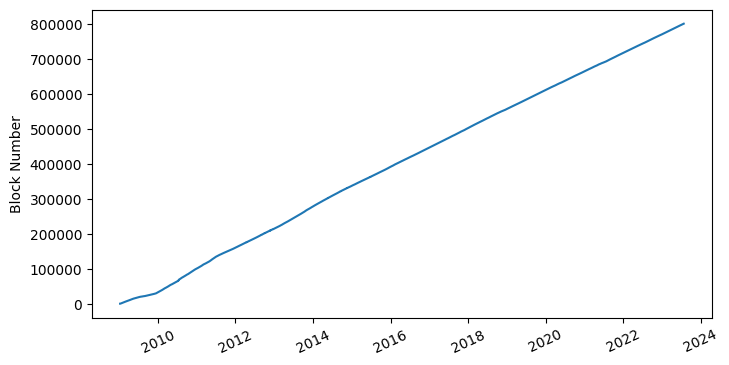

In [7]:
plot(x=hist_data["datetime"], y=hist_data["height"], ylabel="Block Number")

### Transaction Size
When pushing a transaction to the Bitcoin Network, its size varies depending on its contents. The average size for a simple transaction (1 input and 2 outputs) weights around ~200 bytes. Nevertheless, the only limit is the size of the block, which is ~1 megabyte. 

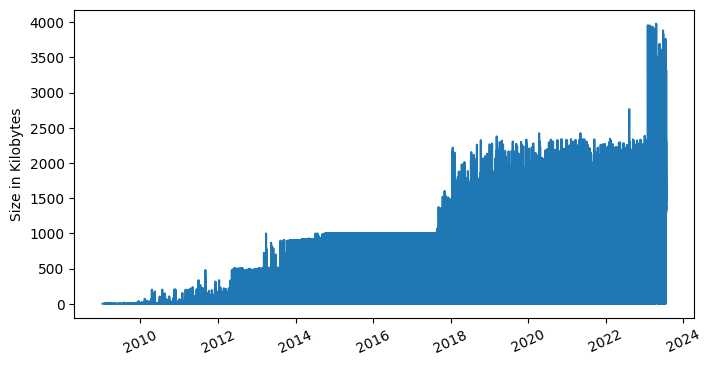

In [8]:
plot(x=hist_data["datetime"], y=hist_data["size"].apply(lambda x: x / 1000), ylabel="Size in Kilobytes")

**Congratulations, now you can push your notebook to your GitHub repo. 